### Hämta taxi-datan och skapa en ny dataframe

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from taxipred.utils.constants import TAXI_CSV_PATH


df = pd.read_csv(TAXI_CSV_PATH)

#Skriver ut de 5 första raderna i datasetet
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [45]:
df. shape

(1000, 11)

In [46]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [48]:
df.isna().sum()



Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [49]:
df.value_counts()

Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price
1.270000          Morning      Weekday      2.0              High                Clear    4.47       0.62         0.16             37.99                  11.335800     1
1.540000          Afternoon    Weekday      3.0              High                Clear    3.62       1.56         0.38             10.13                  9.871800      1
1.560000          Afternoon    Weekday      4.0              High                Clear    2.93       1.31         0.37             79.16                  34.262800     1
1.640000          Afternoon    Weekday      3.0              Low                 Clear    3.32       1.53         0.44             61.16                  32.739600     1
1.710000          Morning      Weekday      4.0              High                Clear    4.45       1.27         0.18             87.85                  2

##### Testar att droppa na. För mycket försvinner. Behöver istället hantera rader med viktiga nullvärden. 

In [50]:
df_test_drop = df.dropna(axis = 0)
df_test_drop.shape


(562, 11)

Fundering --> Kan jag ta ett medelvärde alt median-värde på kilometer för att få in ett värde?

In [55]:
df["Trip_Distance_km"].mean(), df["Trip_Distance_km"].median()

(np.float64(27.070546861761322), np.float64(25.83))

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [57]:
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)


     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
1               47.59   Afternoon     Weekday              1.0   
3               30.33     Evening     Weekday              4.0   
4                 NaN     Evening     Weekday              3.0   
6                3.85   Afternoon     Weekday              4.0   
7               43.44     Evening     Weekend              3.0   
..                ...         ...         ...              ...   
991             35.04     Morning     Weekend              4.0   
993               NaN     Morning     Weekday              3.0   
996             45.95       Night     Weekday              4.0   
997              7.70     Morning     Weekday              3.0   
999             22.85     Morning     Weekend              3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
1                 High   Clear        NaN         0.62             0.43   
3                  Low     NaN       3.48         0.51   

In [58]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

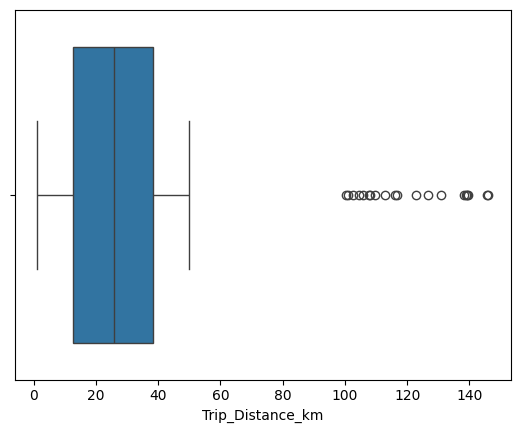

In [ ]:
# Boxplot för antal kilometer 
sns.boxplot(x=df["Trip_Distance_km"])
plt.show()



In [62]:
Q1 = df["Trip_Distance_km"].quantile(0.25)
Q3 = df["Trip_Distance_km"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Trip_Distance_km"] < Q1 - 1.5*IQR) | 
              (df["Trip_Distance_km"] > Q3 + 1.5*IQR)]

print(outliers["Trip_Distance_km"].head(20))

22     105.943550
27     138.098328
64     146.067047
108    112.830958
110    102.747556
141    109.616082
225    130.809001
267    116.196064
268    139.062230
287    100.380420
302    145.747060
338    116.667681
410    104.371791
481    107.786832
532    139.476515
588    122.820191
616    138.763887
747    101.039704
797    108.146994
835    126.547628
Name: Trip_Distance_km, dtype: float64


Hur påverkas medelevärde och median av outliers?

In [63]:
print("Med outliers:")
print(df["Trip_Distance_km"].describe())

print("\nUtan outliers:")
print(df.loc[~df.index.isin(outliers.index), "Trip_Distance_km"].describe())

Med outliers:
count    950.000000
mean      27.070547
std       19.905300
min        1.230000
25%       12.632500
50%       25.830000
75%       38.405000
max      146.067047
Name: Trip_Distance_km, dtype: float64

Utan outliers:
count    930.000000
mean      25.057957
std       14.383638
min        1.230000
25%       12.207500
50%       25.420000
75%       37.652500
max       49.990000
Name: Trip_Distance_km, dtype: float64


Utifrån ovanstående, där jag ser att medianen påverkas ytterst lite av outliers, behåller jag outliers och ersätter nullvärden i Trip_Distance_km med median värde. Sparar den städade datan i en ny df (df_cleaned, som jag senare kommer att spara till en ny csv-fil när den är klar)

In [68]:
distance_median = df["Trip_Distance_km"].median()

df_cleaned = df.copy()
df_cleaned["Trip_Distance_km"] = df_cleaned["Trip_Distance_km"].fillna(distance_median)

df_cleaned["Trip_Distance_km"].describe(), df["Trip_Distance_km"].describe()

(count    1000.000000
 mean       27.008520
 std        19.402661
 min         1.230000
 25%        13.107500
 50%        25.830000
 75%        37.782500
 max       146.067047
 Name: Trip_Distance_km, dtype: float64,
 count    950.000000
 mean      27.070547
 std       19.905300
 min        1.230000
 25%       12.632500
 50%       25.830000
 75%       38.405000
 max      146.067047
 Name: Trip_Distance_km, dtype: float64)

In [70]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


##### Kontrollera Time_Of_Day

In [75]:
print(df["Time_of_Day"].value_counts(dropna=False))

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
NaN           50
Name: count, dtype: int64


Grupperar datan på 'Time of day' och jämför med 'Trip Price' för att se om priset påverkas av vilke tid på dygnet som kunden åker. 

In [76]:
df.groupby("Time_of_Day")["Trip_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Time_of_Day,,,,,,,,
Afternoon,351.0,57.958716,43.432813,6.4729,33.3478,51.0300,69.73675,329.913004
Evening,197.0,56.404504,37.507576,8.6709,35.0028,48.4496,69.19380,296.088697
Morning,265.0,55.949429,37.786101,6.1269,33.3599,50.7312,68.37480,325.098950
Night,89.0,56.304401,39.712048,12.5567,35.8539,51.2721,67.73600,332.043689


Priset påverkas väldigt lite av tid på dygnet. Efter att ha testat med 'mode' i notebooken most_common beslutar jag att ersätta nullvärden med det mest vanligt förekommande tiden på dygnet, som i det här fallet är 'Afternoon'

In [77]:
df.groupby("Time_of_Day")["Trip_Price"].mean()

Time_of_Day
Afternoon    57.958716
Evening      56.404504
Morning      55.949429
Night        56.304401
Name: Trip_Price, dtype: float64

In [78]:
most_common = df["Time_of_Day"].mode()[0]
print(most_common)



Afternoon


In [79]:
df_cleaned["Time_of_Day"] = df_cleaned["Time_of_Day"].fillna(most_common)

In [80]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


##### Hantera nullvärden i "Day_of_week"
Efter att ha utforskat kolumnen i notebooken eda_objects ser jag att det är fler resors som sker på vardagar än på helger. Ersätter jag null-värden med weekday blir det ännu fler resor som utförs på veckordagar, vilken kan vara missvisande. Beslutar mig därför för att ersätta nullvärden med texten 'Unknown' i min rensade dataframe. 


In [82]:
df_cleaned["Day_of_Week"] = df_cleaned["Day_of_Week"].fillna("Unknown")

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


##### Hantera nullvärden i "Traffic conditions"
Efter att ha utforskat kolumnen i notebooken eda_objects ser jag att det finns en viss korrelation mellan mängden trafik och pris. Ersätter jag nullvärden med 'most common' finns risk att priset inte återspeglas i trafiksituationen. 
Jag bestämmer mig därför för att ändra värdet till Unknown även här. 

In [83]:
df_cleaned["Traffic_Conditions"] = df_cleaned["Traffic_Conditions"].fillna("Unknown")

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


##### Hantera nullvärden i "Weather"
Efter att ha utforskat kolumnen i notebooken eda_objects ser jag att det finns en viss korrelation mellan mängden väder och pris. Ersätter jag nullvärden med 'most common' finns det risk att det det blir en snedfördelning av 'Clear' i datasetet. Ersätter därför nullvärden med 'Unknown' även här. 

In [84]:
df_cleaned["Weather"] = df_cleaned["Weather"].fillna("Unknown")

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
